# Market Rates API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/MarketRatesAPI/MarketRatesAPI.ipynb) 

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
signal_ocean_api_key = '' #replace with your subscription key

## Market Rates API
The Market Rates API retrieves available routes and market rates. First create connection towards
Market Rates API in order to find available routes by vessel class:

In [2]:
from signal_ocean import Connection, MarketRatesAPI
from datetime import date

connection = Connection(api_key=signal_ocean_api_key)
mr_api = MarketRatesAPI(connection)

#### Get the available vessel classes
Retrieve the vessel classes for which we can get routes or market rates:

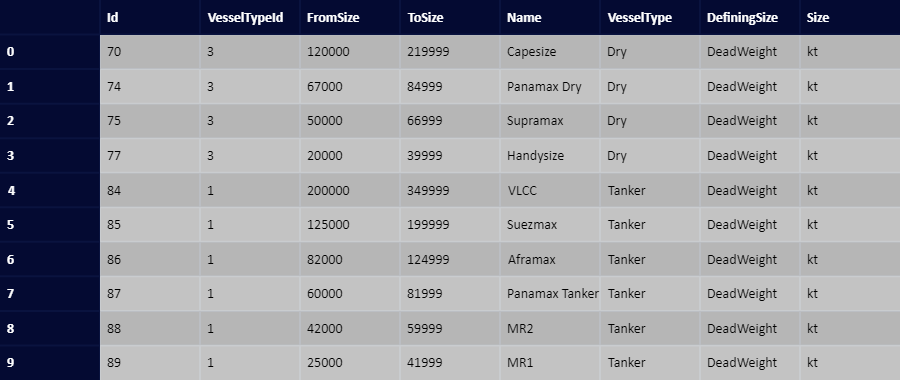

In [3]:
from signal_ocean.market_rates.utils import create_dataframe
from signal_ocean.plots import styled_table, line_chart

vessel_classes = mr_api.get_vessel_classes()
styled_table(create_dataframe(vessel_classes))

#### Get routes for a vessel class
Based on the vessel classes that we got above we can request available routes for VLCC vessels

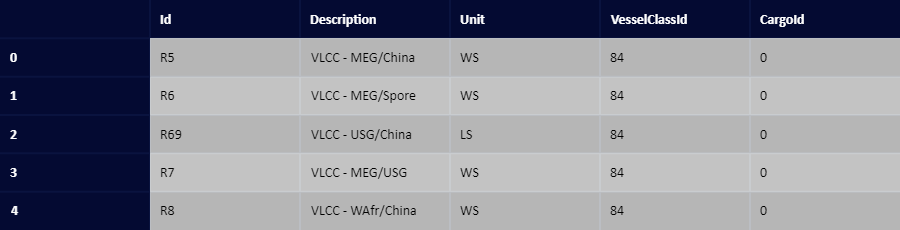

In [4]:
vlcc_routes = mr_api.get_routes(vessel_class_id=84)
vlcc_routes_df = create_dataframe(vlcc_routes).drop(
    ['LoadPortId', 'DischargePortId', 'LoadAreaId',
     'DischargeAreaId', 'LoadPort2Id', 'DischargePort2Id', 'LoadArea2Id',
     'DischargeArea2Id', 'DeprecatedTo', 'DeprecatedSince'], axis=1)
styled_table(vlcc_routes_df)

#### Get the market rates
Now we can request the market rate on a given date for one of the routes we got in previous step or
for all routes matching this vessel class

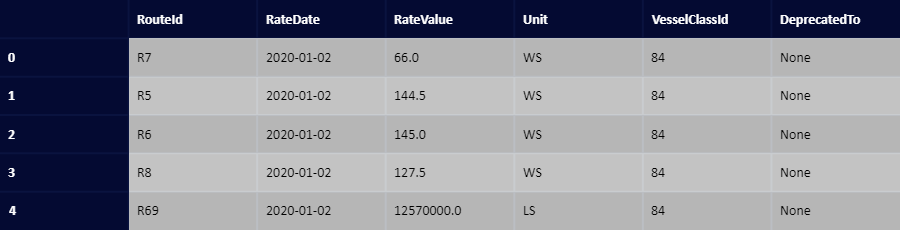

In [5]:
from signal_ocean.market_rates import CargoId

market_rates_for_vlcc = mr_api.get_market_rates(date(2020, 1, 2),
                                                vessel_class_id=84,
                                                cargo_id=CargoId.DIRTY)
styled_table(create_dataframe(market_rates_for_vlcc))

We can also see how market rates evolve on the routes of a certain vessel class for a given time period.
Below we plot the VLCC market rates in WS from October through December 2020.

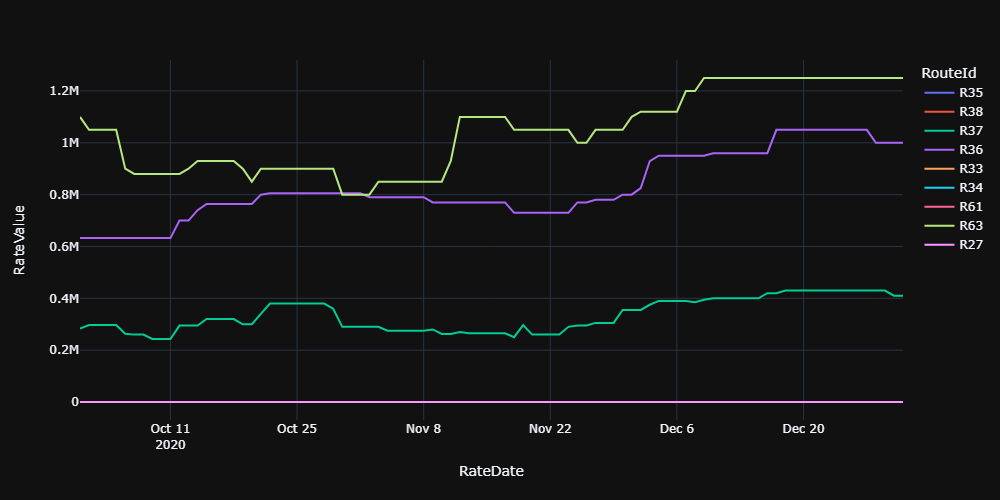

In [9]:
import warnings
warnings.filterwarnings('ignore')

vlcc_rates = mr_api.get_market_rates(start_date=date(2020, 10, 1),
                                end_date=date(2020, 12, 31),
                                vessel_class_id=88,
                                cargo_id=CargoId.CLEAN)
line_chart(create_dataframe(vlcc_rates), 'RateDate', "RateValue", "RouteId")